In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from ISLP.models import (ModelSpec as MS, summarize , poly)
from sklearn.model_selection import train_test_split

np.random.seed(24521421)

# Experiment 1:

- Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu gồm có 1 tập train gồm N=10 điểm dữ liệu và 1 tập test gồm N=10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng (0,1) và giá trị target y = f(x)=sin(1 + x^2) + ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 60-61 của slides (standard deviation là 0.03).
- Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 70 của slides. Các em cần plot được minh họa ghép 9 đồ thị vào trong 1 hình như trong trang 70 này.
- Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 68 của slides. Trong file ipynb cần thể hiện bảng thống kê kết quả này.

In [2]:
D = []

for _ in range(3):
    x = np.random.random(size=20)
    err = np.random.normal(loc=0,scale=0.03,size=20)
    y = [(math.sin(1 + x[i] ** 2) + err[i]) for i in range(20)]
    D.append([x , y])

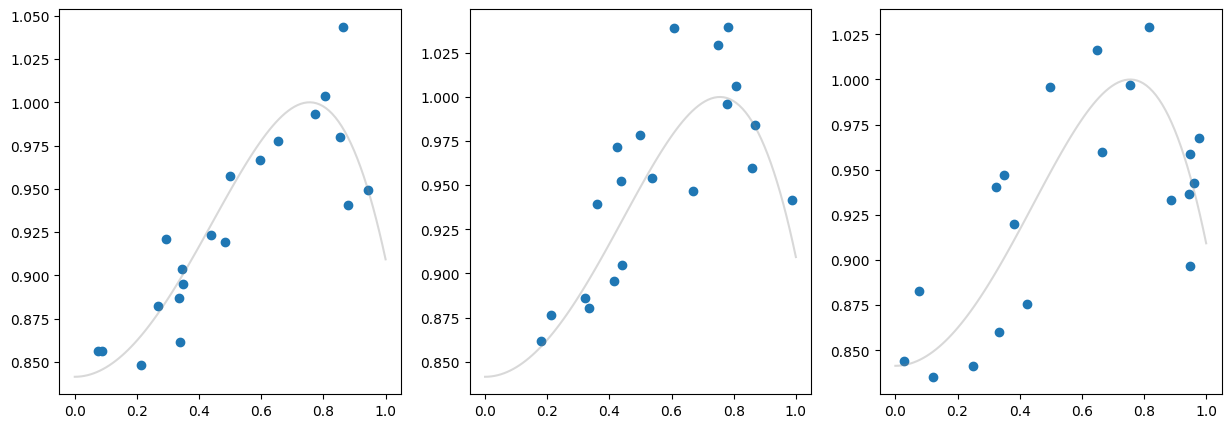

In [3]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))

for i in range(3):
    ax[i].scatter(D[i][0] , D[i][1])

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[i].plot(x , y , c='gray' , alpha=0.3)

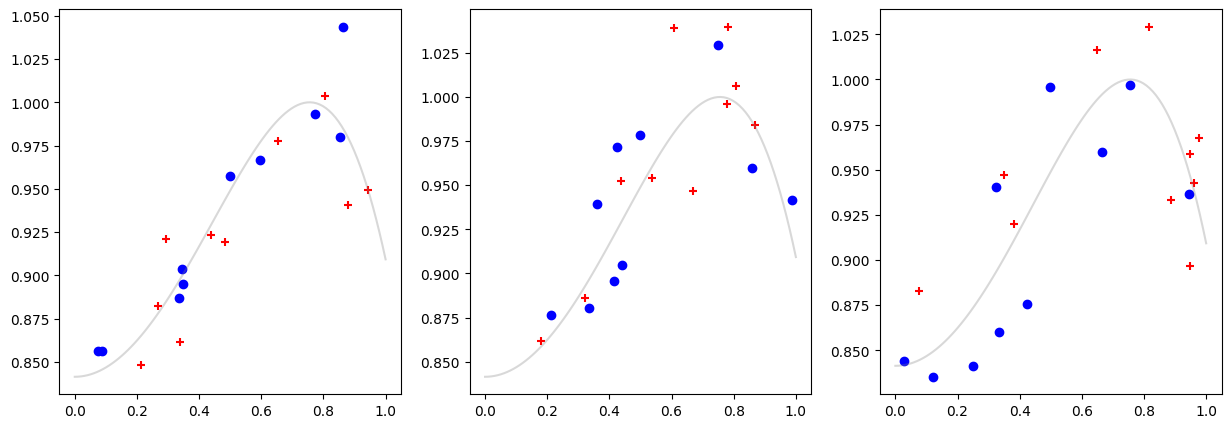

In [4]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))


for test_number in range(3):
    E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[test_number][0] , D[test_number][1] , random_state=24521421 , test_size=0.5 , shuffle=True)
    
    ax[test_number].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[test_number].scatter(E_out_x , E_out_y , c='red', marker='+')

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[test_number].plot(x , y , c='gray' , alpha=0.3)

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_13572\3509347295.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_13572\3509347295.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_13572\3509347295.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [r

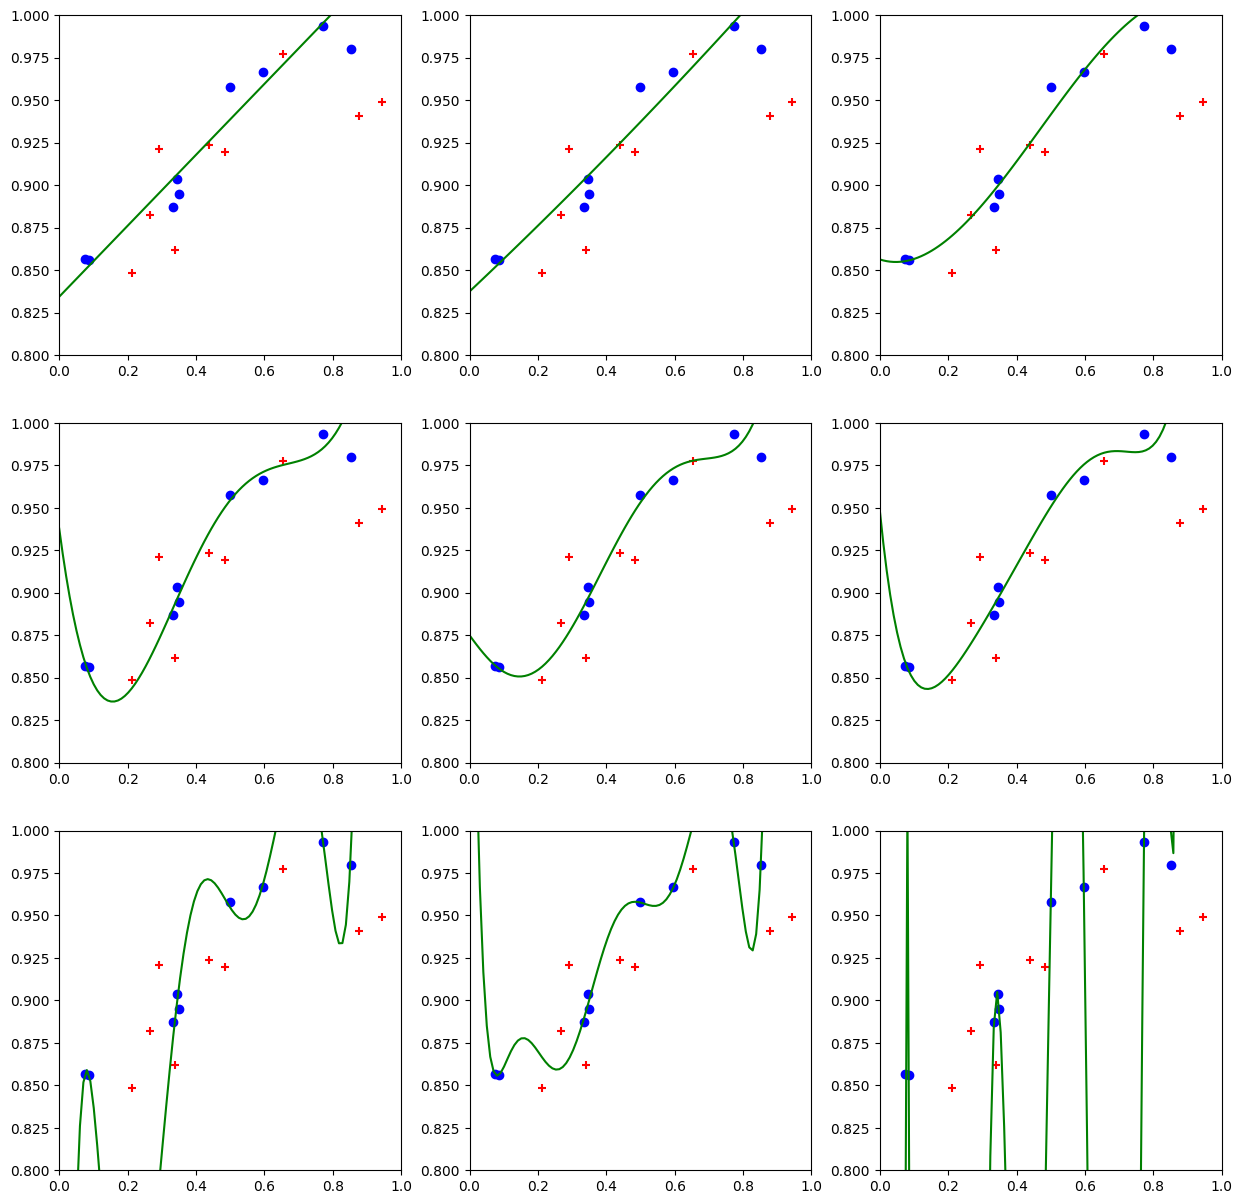

In [ ]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.8 , 1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



In [ ]:
E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.8 , 1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df_train = pd.DataFrame(data=points , columns=['X' , 'Y'])
    points = [[E_out_x[i] , E_out_y[i]] for i in range(10)]
    df_test = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    x_test = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    # y_pred = result.predict(E_out_x)
    print(E_out_x)

ValueError: shapes (1,10) and (2,) not aligned: 10 (dim 1) != 2 (dim 0)